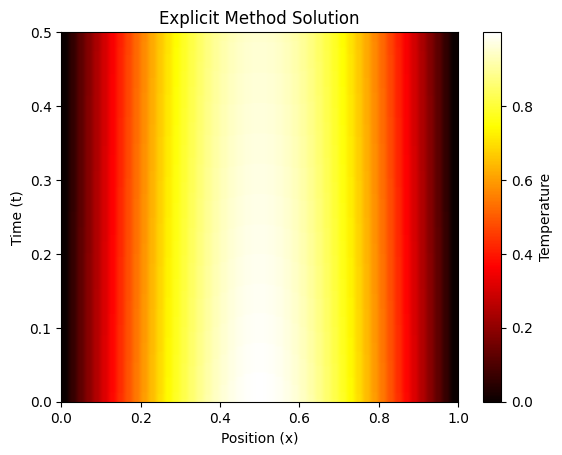

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def explicit_method_heat_equation(L, T, alpha, x_points, t_points, u0, u_left, u_right):
    dx = L / (x_points - 1)
    dt = T / (t_points - 1)
    r = alpha * dt / dx**2

    if r > 0.5:
        raise ValueError(f"Stability condition not met: r = {r} > 0.5")

    x = np.linspace(0, L, x_points)
    t = np.linspace(0, T, t_points)
    u = np.zeros((t_points, x_points))

    u[0, :] = u0(x)
    u[:, 0] = u_left
    u[:, -1] = u_right

    for n in range(0, t_points - 1):
        for i in range(1, x_points - 1):
            u[n + 1, i] = u[n, i] + r * (u[n, i - 1] - 2 * u[n, i] + u[n, i + 1])

    return x, t, u

# Example Usage
L, T, alpha = 1.0, 0.5, 0.01
x_points, t_points = 50, 500
u0 = lambda x: np.sin(np.pi * x)
u_left, u_right = 0, 0

x, t, u = explicit_method_heat_equation(L, T, alpha, x_points, t_points, u0, u_left, u_right)

plt.imshow(u, extent=[0, L, 0, T], origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label="Temperature")
plt.title("Explicit Method Solution")
plt.xlabel("Position (x)")
plt.ylabel("Time (t)")
plt.show()


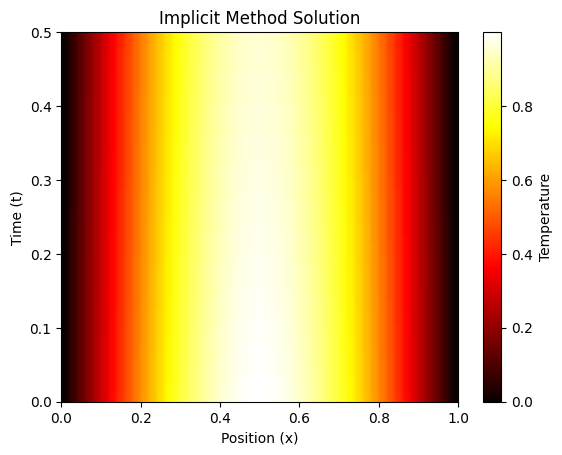

In [3]:
def implicit_method_heat_equation(L, T, alpha, x_points, t_points, u0, u_left, u_right):
    dx = L / (x_points - 1)
    dt = T / (t_points - 1)
    r = alpha * dt / dx**2

    x = np.linspace(0, L, x_points)
    t = np.linspace(0, T, t_points)
    u = np.zeros((t_points, x_points))

    u[0, :] = u0(x)
    u[:, 0] = u_left
    u[:, -1] = u_right

    A = np.zeros((x_points - 2, x_points - 2))
    np.fill_diagonal(A, 1 + 2 * r)
    np.fill_diagonal(A[:-1, 1:], -r)
    np.fill_diagonal(A[1:, :-1], -r)

    for n in range(0, t_points - 1):
        b = u[n, 1:-1]
        u_next = np.linalg.solve(A, b)
        u[n + 1, 1:-1] = u_next

    return x, t, u

x, t, u = implicit_method_heat_equation(L, T, alpha, x_points, t_points, u0, u_left, u_right)

plt.imshow(u, extent=[0, L, 0, T], origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label="Temperature")
plt.title("Implicit Method Solution")
plt.xlabel("Position (x)")
plt.ylabel("Time (t)")
plt.show()


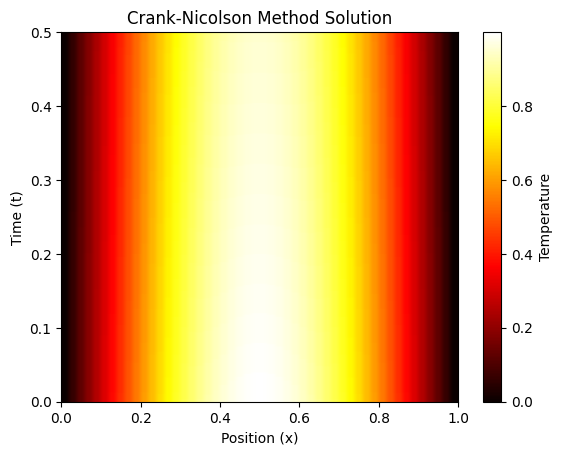

In [4]:
def crank_nicolson_method_heat_equation(L, T, alpha, x_points, t_points, u0, u_left, u_right):
    dx = L / (x_points - 1)
    dt = T / (t_points - 1)
    r = alpha * dt / dx**2

    x = np.linspace(0, L, x_points)
    t = np.linspace(0, T, t_points)
    u = np.zeros((t_points, x_points))

    u[0, :] = u0(x)
    u[:, 0] = u_left
    u[:, -1] = u_right

    A = np.zeros((x_points - 2, x_points - 2))
    B = np.zeros((x_points - 2, x_points - 2))

    np.fill_diagonal(A, 1 + r)
    np.fill_diagonal(A[:-1, 1:], -r / 2)
    np.fill_diagonal(A[1:, :-1], -r / 2)

    np.fill_diagonal(B, 1 - r)
    np.fill_diagonal(B[:-1, 1:], r / 2)
    np.fill_diagonal(B[1:, :-1], r / 2)

    for n in range(0, t_points - 1):
        b = B @ u[n, 1:-1]
        u_next = np.linalg.solve(A, b)
        u[n + 1, 1:-1] = u_next

    return x, t, u

x, t, u = crank_nicolson_method_heat_equation(L, T, alpha, x_points, t_points, u0, u_left, u_right)

plt.imshow(u, extent=[0, L, 0, T], origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label="Temperature")
plt.title("Crank-Nicolson Method Solution")
plt.xlabel("Position (x)")
plt.ylabel("Time (t)")
plt.show()


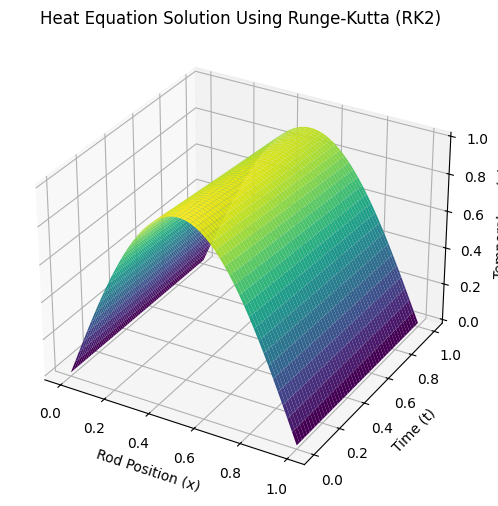

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def heat_equation_runge_kutta(L, T, alpha, nx, nt, u0, u_left, u_right):
    """
    Solve the 1D heat equation using Runge-Kutta (RK2) time integration.

    Parameters:
        L (float): Length of the rod.
        T (float): Total time.
        alpha (float): Thermal diffusivity.
        nx (int): Number of spatial grid points.
        nt (int): Number of time steps.
        u0 (callable): Initial condition function u(x, 0).
        u_left (float): Boundary condition at x=0.
        u_right (float): Boundary condition at x=L.

    Returns:
        x (np.ndarray): Spatial grid points.
        t (np.ndarray): Time points.
        u (np.ndarray): Solution array u(x, t).
    """
    # Discretize space and time
    dx = L / (nx - 1)
    dt = T / (nt - 1)
    x = np.linspace(0, L, nx)
    t = np.linspace(0, T, nt)

    # Stability condition
    r = alpha * dt / dx**2
    if r > 0.5:
        raise ValueError(f"Stability condition not met: r = {r} > 0.5")

    # Initialize the solution matrix
    u = np.zeros((nt, nx))
    u[0, :] = u0(x)
    u[:, 0] = u_left  # Boundary condition at x=0
    u[:, -1] = u_right  # Boundary condition at x=L

    # Helper function for the spatial derivative
    def laplacian(u):
        dudx2 = np.zeros_like(u)
        dudx2[1:-1] = (u[:-2] - 2 * u[1:-1] + u[2:]) / dx**2
        return alpha * dudx2

    # Runge-Kutta time stepping
    for n in range(nt - 1):
        k1 = dt * laplacian(u[n, :])
        k2 = dt * laplacian(u[n, :] + 0.5 * k1)
        u[n + 1, :] = u[n, :] + k2

    return x, t, u


L = 1.0  # Length of the rod
T = 1.0  # Total time
alpha = 0.01  # Thermal diffusivity
nx = 50  # Number of spatial points
nt = 200  # Number of time points

initial_condition = lambda x: np.sin(np.pi * x)  # Initial condition: sin(pi * x)
u_left_boundary = 0.0  # Boundary condition at x=0
u_right_boundary = 0.0  # Boundary condition at x=L

x, t, u = heat_equation_runge_kutta(L, T, alpha, nx, nt,
                                    u0=initial_condition,
                                    u_left=u_left_boundary,
                                    u_right=u_right_boundary)

X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u, cmap="viridis")
ax.set_title("Heat Equation Solution Using Runge-Kutta (RK2)")
ax.set_xlabel("Rod Position (x)")
ax.set_ylabel("Time (t)")
ax.set_zlabel("Temperature (u)")
plt.show()


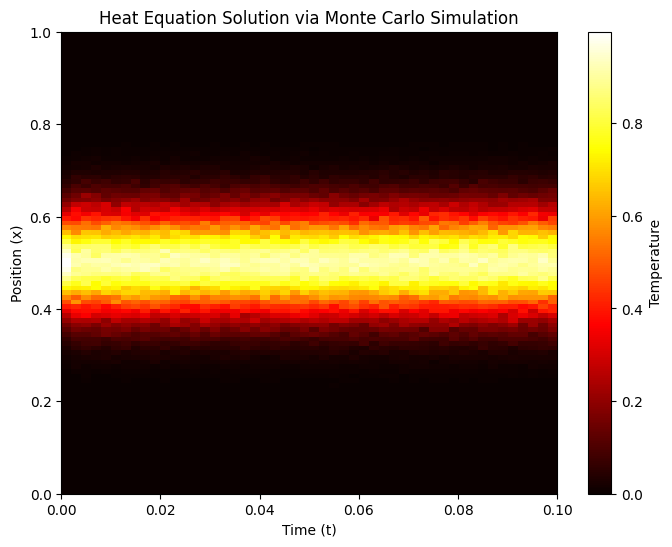

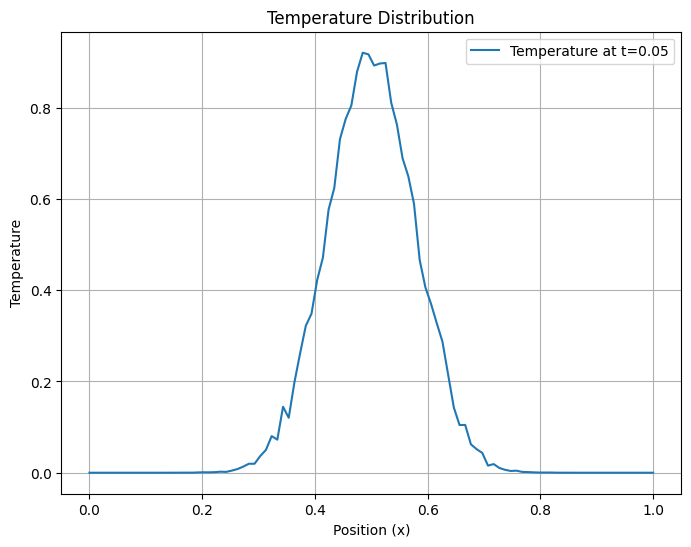

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_heat_equation(L, T, x_points, t_points, n_particles, n_steps):
    """
    Solve the heat equation using Monte Carlo simulations.

    Parameters:
        L (float): Length of the domain.
        T (float): Total simulation time.
        x_points (int): Number of spatial points.
        t_points (int): Number of time points.
        n_particles (int): Number of particles for the Monte Carlo simulation.
        n_steps (int): Number of steps per particle.

    Returns:
        x (np.ndarray): Spatial points.
        t (np.ndarray): Time points.
        u (np.ndarray): Solution array u(x, t).
    """
    # Discretize space and time
    x = np.linspace(0, L, x_points)
    t = np.linspace(0, T, t_points)
    dx = x[1] - x[0]
    dt = T / (t_points - 1)
    alpha = dx**2 / (2 * dt)  # Effective diffusivity

    # Initialize solution
    u = np.zeros((t_points, x_points))

    # Set the initial condition: heat starts at the center
    u[0, :] = np.exp(-100 * (x - L / 2)**2)  # Gaussian peak at the center

    # Monte Carlo simulation for each time point
    for n in range(1, t_points):
        for i in range(x_points):
            sum_temp = 0
            for _ in range(n_particles):
                pos = x[i]  # Start particle at position x[i]
                for _ in range(n_steps):
                    pos += np.random.choice([-dx, dx])  # Random walk step
                    if pos <= 0 or pos >= L:  # Reflective boundary conditions
                        break
                sum_temp += np.exp(-100 * (pos - L / 2)**2)  # Contribution
            u[n, i] = sum_temp / n_particles

    return x, t, u


L = 1.0          # Length of the domain
T = 0.1          # Total simulation time
x_points = 100   # Number of spatial points
t_points = 50    # Number of time points
n_particles = 50  # Number of particles for Monte Carlo
n_steps = 10    # Number of steps per particle

x, t, u = monte_carlo_heat_equation(L, T, x_points, t_points, n_particles, n_steps)

plt.figure(figsize=(8, 6))
plt.imshow(u.T, extent=[0, T, 0, L], origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='Temperature')
plt.title('Heat Equation Solution via Monte Carlo Simulation')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.show()

plt.figure(figsize=(8, 6))
time_index = int(t_points / 2)
plt.plot(x, u[time_index, :], label=f'Temperature at t={t[time_index]:.2f}')
plt.title('Temperature Distribution')
plt.xlabel('Position (x)')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import plotly.graph_objects as go

def monte_carlo_heat_eq_plotly(num_particles=1000, num_steps=100, domain_length=1.0, dt=0.01, dx=0.01, alpha=0.01):
    """
    Monte Carlo simulation for the heat equation with Plotly visualization.

    Parameters:
        num_particles (int): Number of particles in the simulation.
        num_steps (int): Number of time steps.
        domain_length (float): Length of the spatial domain.
        dt (float): Time step size.
        dx (float): Spatial step size.
        alpha (float): Thermal diffusivity.
    """
    # Discretize the spatial domain
    x_points = int(domain_length / dx) + 1
    x = np.linspace(0, domain_length, x_points)

    # Particle positions, initialize uniformly in the domain
    particle_positions = np.random.uniform(0, domain_length, size=num_particles)

    # Precompute probabilities for random walk
    jump_prob = alpha * dt / dx**2  # Ensure this satisfies stability conditions
    if jump_prob > 0.5:
        raise ValueError("Jump probability too high! Reduce dt or increase dx for stability.")

    # Array to store particle counts
    particle_density = np.zeros((num_steps, x_points))

    # Monte Carlo simulation: track particle movements
    for step in range(num_steps):
        # Update particle positions using random walk
        random_moves = np.random.choice([-1, 0, 1], size=num_particles, p=[jump_prob / 2, 1 - jump_prob, jump_prob / 2])
        particle_positions += random_moves * dx

        # Reflective boundary conditions
        particle_positions = np.clip(particle_positions, 0, domain_length)

        # Count particles in spatial bins
        particle_counts, _ = np.histogram(particle_positions, bins=x_points, range=(0, domain_length))
        particle_density[step, :] = particle_counts / num_particles

    # Create an animated Plotly heatmap
    frames = []
    for step in range(num_steps):
        frames.append(go.Frame(
            data=[go.Heatmap(z=[particle_density[step]], x=x, y=[""], colorscale="Viridis", showscale=True)],
            name=f"t={step*dt:.2f}"
        ))

    # Initial frame
    fig = go.Figure(
        data=[go.Heatmap(z=[particle_density[0]], x=x, y=[""], colorscale="Viridis", showscale=True)],
        layout=go.Layout(
            title="Monte Carlo Simulation of Heat Equation",
            xaxis=dict(title="Spatial Domain (x)"),
            yaxis=dict(title="Temperature Density"),
            updatemenus=[
                dict(
                    type="buttons",
                    showactive=False,
                    buttons=[
                        dict(label="Play", method="animate", args=[None, dict(frame=dict(duration=50, redraw=True))]),
                        dict(label="Pause", method="animate", args=[[None], dict(frame=dict(duration=0, redraw=False))])
                    ]
                )
            ]
        ),
        frames=frames
    )

    # Show the animated plot
    fig.show()

# Run the Monte Carlo simulation and plot with Plotly
monte_carlo_heat_eq_plotly(num_particles=1000, num_steps=100, domain_length=1.0, dt=0.001, dx=0.02, alpha=0.01)
